<a href="https://colab.research.google.com/github/schauppi/Udemy_Tensorflow/blob/schauppi/Convolutional_Neural_Networks/cnn_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the data
data = tf.keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
#prepare data
x_train, x_test = x_train/255.0, x_test/255.0

In [8]:
#N x H x W x C for CNN
print(x_train.shape)
x_train = np.expand_dims(x_train, -1)
print(x_train.shape)
print(x_test.shape)
x_test = np.expand_dims(x_test, -1)
print(x_test.shape)

(60000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28)
(10000, 28, 28, 1)


In [14]:
#number of classes
classes = len(set(y_train))
print(classes)

10


In [13]:
input_data_shape = x_train[0].shape

In [16]:
#build the model with functional api
i = tf.keras.layers.Input(shape = input_data_shape)
x = tf.keras.layers.Conv2D(32, (3,3), strides=2, activation="relu")(i)
x = tf.keras.layers.Conv2D(64, (3,3), strides=2, activation="relu")(x)
x = tf.keras.layers.Conv2D(128, (3,3), strides=2, activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(classes, activation="softmax")(x)

model = tf.keras.models.Model(i, x)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656

In [18]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [19]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 40s 5ms/step - loss: 0.7071 - accuracy: 0.7408 - val_loss: 0.4257 - val_accuracy: 0.8366
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3797 - accuracy: 0.8574 - val_loss: 0.3501 - val_accuracy: 0.8713
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3266 - accuracy: 0.8775 - val_loss: 0.3387 - val_accuracy: 0.8705
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2858 - accuracy: 0.8934 - val_loss: 0.3142 - val_accuracy: 0.8855
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2616 - accuracy: 0.9029 - val_loss: 0.3064 - val_accuracy: 0.8882
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2321 - accuracy: 0.9105 - val_loss: 0.3010 - val_accuracy: 0.8922
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2140 - accuracy: 0.9182 - val_loss: 0.3050 - val_ac

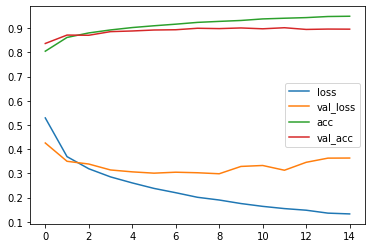

In [23]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()